In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from xgboost import XGBRegressor

In [ ]:
def model_evaluation(model,X_train,X_test,Y_train,Y_test):

    model.fit(X_train,Y_train)

    training_data_prediction = model.predict(X_train)
    testing_data_prediction  =  model.predict(X_test)

    r_sq_train = metrics.r2_score(Y_train, training_data_prediction)
    r_sq_test  = metrics.r2_score(Y_test, testing_data_prediction)
    rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
    rmse_test  = np.sqrt(metrics.mean_squared_error(Y_test, testing_data_prediction))

    print("R squared value of train data: ",r_sq_train)
    print("RMSE of train data: ",rmse_train)
    print("=========================================")
    print("R squared value of test data: ",r_sq_test)
    print("RMSE of test data: ",rmse_test)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].scatter(Y_train, training_data_prediction)
    axs[0].set_title("Actual yield vs Predicted yield ( On training data)")
    axs[0].set_xlabel("Actual yield")
    axs[0].set_ylabel("Predicted yield")


    axs[1].scatter(Y_test, testing_data_prediction)
    axs[1].set_title("Actual yield vs Predicted yield (On testing data) ")
    axs[1].set_xlabel("Actual yield")
    axs[1].set_ylabel("Predicted yield")
    plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


load and understand the data

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Playground Dataset/train.csv")

In [ ]:
dataset.shape

(193573, 11)

In [ ]:
dataset.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Data preprocessing (label endoce)

In [ ]:
dataset['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [ ]:
dataset['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [ ]:
dataset['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [ ]:
dataset.replace({'cut':{'Ideal':0, 'Premium':1, 'Very Good':2, 'Good':3, 'Fair':4}}, inplace=True)
dataset.replace({'color':{'G':0, 'E':1, 'F':2, 'H':3, 'D':4, 'I':5, 'J':6}}, inplace=True)
dataset.replace({'clarity':{'SI1':0, 'VS2':1, 'VS1':2, 'SI2':3, 'VVS2':4, 'VVS1':5, 'IF':6, 'I1':7}}, inplace=True)

In [ ]:
dataset.rename(columns={"z": "height"}, inplace=True)
dataset.rename(columns={"y": "width"}, inplace=True)
dataset.rename(columns={"x": "length"}, inplace=True)

In [ ]:
dataset.head()

,id,carat,cut,color,clarity,depth,table,length,width,height,price
0,0,1.52,1,2,1,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,2,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,0,0,2,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,0,0,2,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,1,0,1,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
dataset['cut'].value_counts()

0    92454
1    49910
2    37566
3    11622
4     2021
Name: cut, dtype: int64

In [ ]:
dataset['color'].value_counts()

0    44391
1    35869
2    34258
3    30799
4    24286
5    17514
6     6456
Name: color, dtype: int64

In [ ]:
dataset['clarity'].value_counts()

0    53272
1    48027
2    30669
3    30484
4    15762
5    10628
6     4219
7      512
Name: clarity, dtype: int64

EDA

In [ ]:
correlation = dataset.corr()

<Axes: >

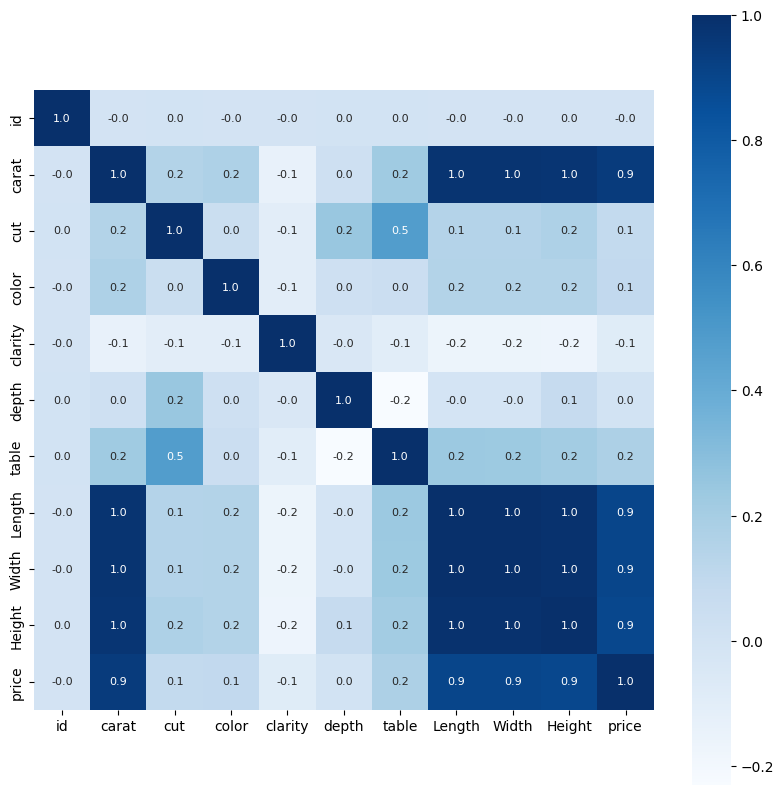

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='cut', ylabel='count'>

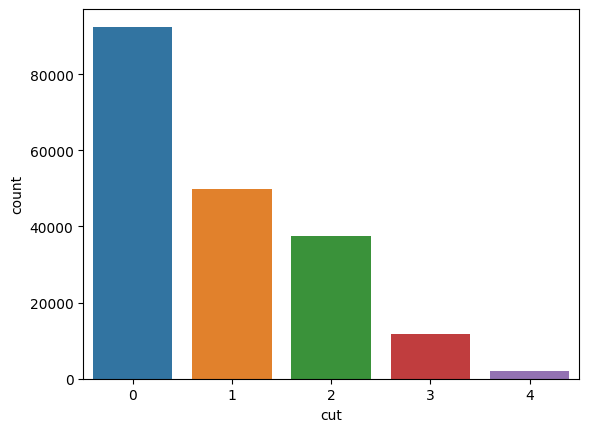

In [ ]:
sns.countplot(x='cut', data=dataset)

<Axes: xlabel='color', ylabel='count'>

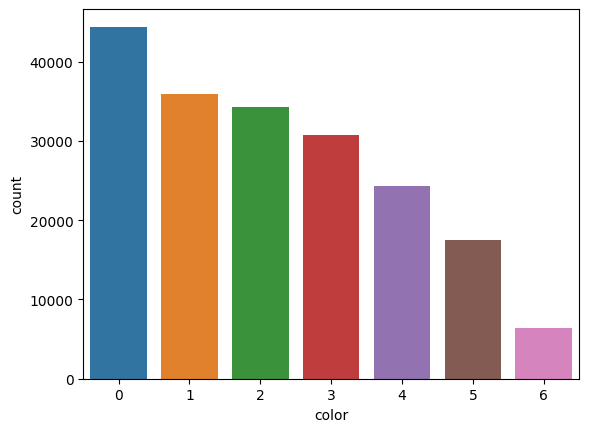

In [ ]:
sns.countplot(x='color', data=dataset)

<Axes: xlabel='clarity', ylabel='count'>

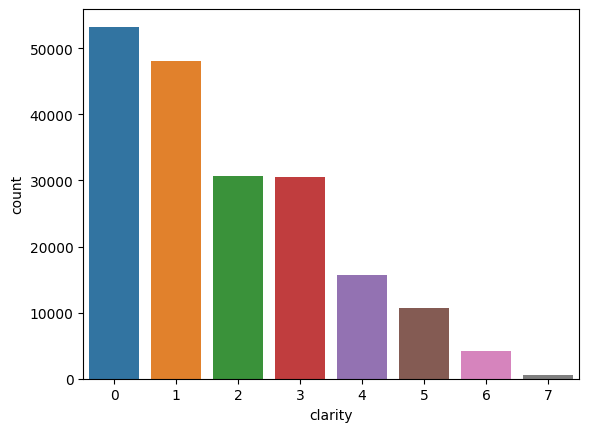

In [ ]:
sns.countplot(x='clarity', data=dataset)

(3.4, 9.0)

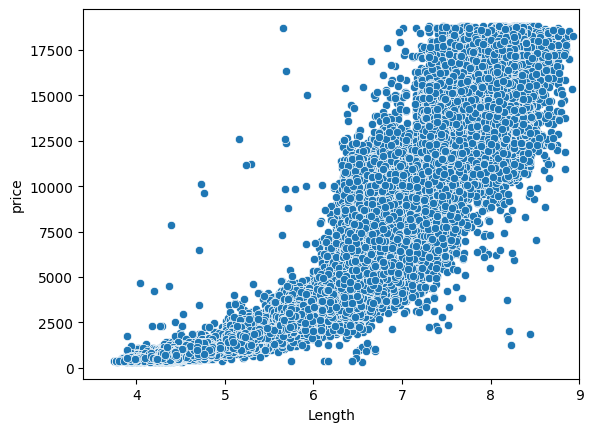

In [ ]:
sns.scatterplot(x='Length', y='price', data=dataset)
plt.xlim(3.4,9)

(3.4, 9.0)

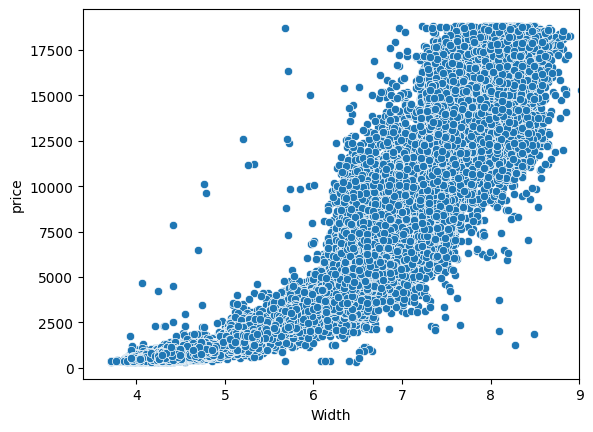

In [ ]:
sns.scatterplot(x='Width', y='price', data=dataset)
plt.xlim(3.4,9)

(2.0, 5.0)

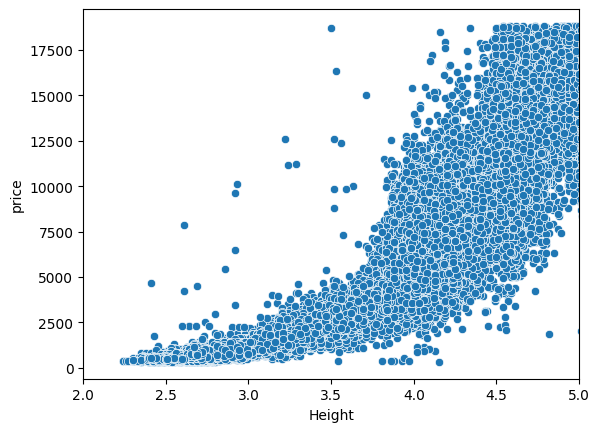

In [ ]:
sns.scatterplot(x='Height', y='price', data=dataset)
plt.xlim(2,5)

(0.0, 2.5)

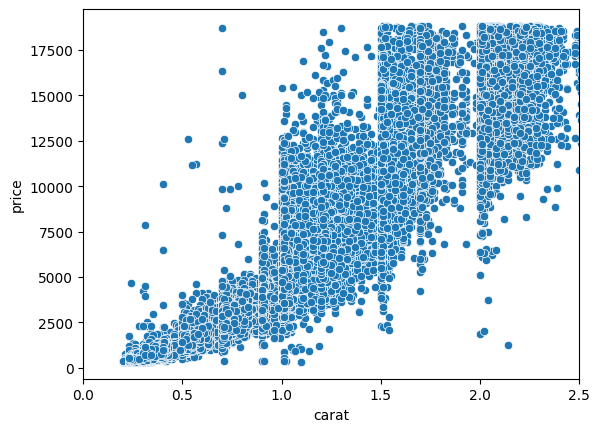

In [ ]:
sns.scatterplot(x='carat', y='price', data=dataset)
plt.xlim(0,2.5)

(3.7, 9.0)

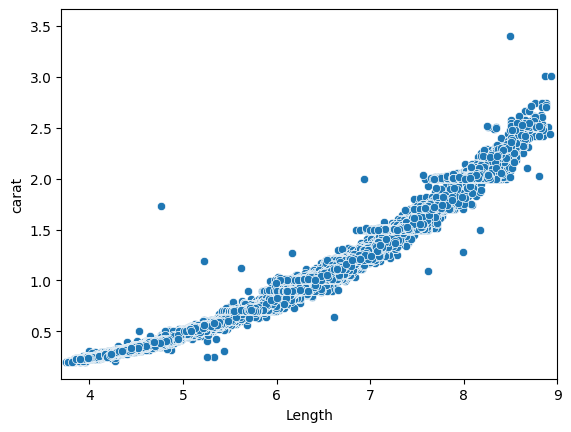

In [ ]:
sns.scatterplot(x='Length', y='carat', data=dataset)
plt.xlim(3.7,9)

(3.7, 9.0)

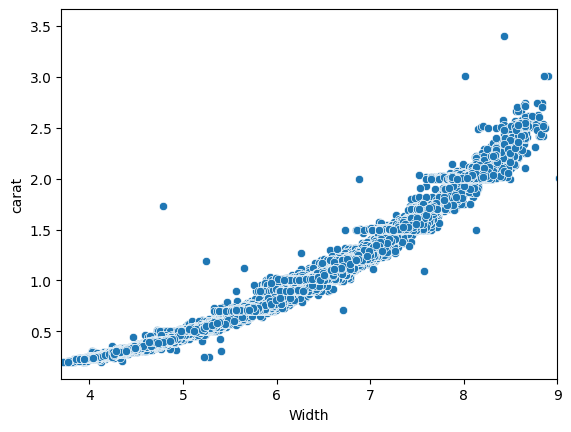

In [ ]:
sns.scatterplot(x='Width', y='carat', data=dataset)
plt.xlim(3.7,9)

(2.0, 6.0)

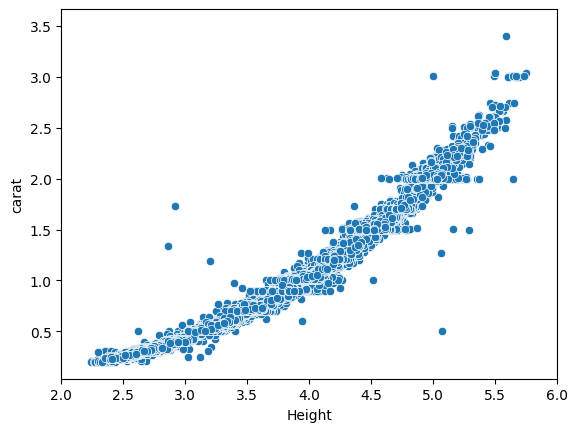

In [ ]:
sns.scatterplot(x='Height', y='carat', data=dataset)
plt.xlim(2,6)

Splitt data


In [ ]:
X = dataset.drop(columns=['price','id'], axis=1)

In [ ]:
Y = dataset['price']

In [ ]:
X.head()

,carat,cut,color,clarity,depth,table,length,width,height
0,1.52,1,2,1,62.2,58.0,7.27,7.33,4.55
1,2.03,2,6,3,62.0,58.0,8.06,8.12,5.05
2,0.70,0,0,2,61.2,57.0,5.69,5.73,3.50
3,0.32,0,0,2,61.6,56.0,4.38,4.41,2.71
4,1.70,1,0,1,62.6,59.0,7.65,7.61,4.77


In [ ]:
Y.head()

0    13619
1    13387
2     2772
3      666
4    14453
Name: price, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.25, random_state=10)

Model train and test

In [ ]:
model1 = XGBRegressor()

R squared value of train data:  0.9837563745360824
RMSE of train data:  513.9791388236807
R squared value of test data:  0.9779176997575647
RMSE of test data:  600.2171774238127


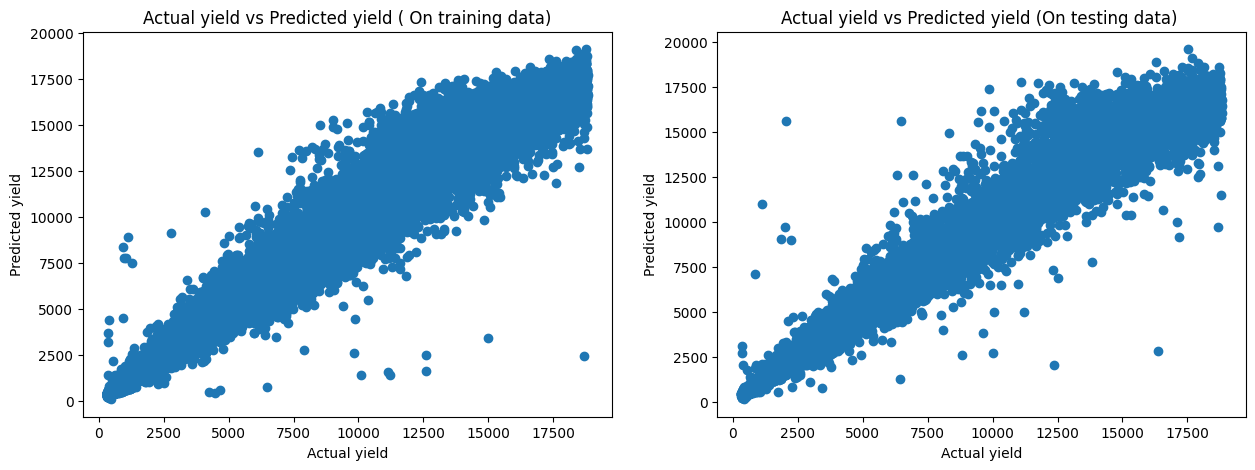

In [ ]:
model_evaluation(model1,X_train,X_test,Y_train,Y_test)

In [ ]:
testDataset = pd.read_csv("/content/drive/MyDrive/Playground Dataset/test.csv")

In [ ]:
testDataset.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [ ]:
id = testDataset['id']

In [ ]:
testDataset.rename(columns={"z": "height"}, inplace=True)
testDataset.rename(columns={"y": "width"}, inplace=True)
testDataset.rename(columns={"x": "length"}, inplace=True)

In [ ]:
testDataset.replace({'cut':{'Ideal':0, 'Premium':1, 'Very Good':2, 'Good':3, 'Fair':4}}, inplace=True)
testDataset.replace({'color':{'G':0, 'E':1, 'F':2, 'H':3, 'D':4, 'I':5, 'J':6}}, inplace=True)
testDataset.replace({'clarity':{'SI1':0, 'VS2':1, 'VS1':2, 'SI2':3, 'VVS2':4, 'VVS1':5, 'IF':6, 'I1':7}}, inplace=True)

In [ ]:
submissionTest = testDataset.drop(columns=['id'], axis=1)

In [ ]:
submissionTest.head()

,carat,cut,color,clarity,depth,table,length,width,height
0,0.35,0,4,1,62.3,56.0,4.51,4.54,2.82
1,0.77,2,2,3,62.8,56.0,5.83,5.87,3.68
2,0.71,0,5,1,61.9,53.0,5.77,5.74,3.55
3,0.33,0,0,4,61.6,55.0,4.44,4.42,2.73
4,1.20,2,5,1,62.7,56.0,6.75,6.79,4.24


In [ ]:
predictions = model1.predict(submissionTest)

In [ ]:
submission_df = pd.DataFrame({'id': id, 'price': predictions})
submission_df.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files

In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

In [ ]:
with open('predictor.pickle', 'wb') as file:
    pickle.dump(model1, file)

In [ ]:
test_data = {
    'carat': [5],         #  Carat value
    'cut': [0],             # Example: Cut value (0 for Ideal, 1 for Premium, etc.)
    'color': [3],           # Example: Color value (0 for G, 1 for E, etc.)
    'clarity': [2],         # Example: Clarity value (0 for SI1, 1 for VS2, etc.)
    'depth': [61.5],        # Example: Depth value
    'table': [55.0],        # Example: Table value
    'length': [5.0],        # Example: Length value
    'width': [3.0],         # Example: Width value
    'height': [2.0]         # Example: Height value
}


In [ ]:
test_df = pd.DataFrame(test_data)

In [ ]:
predicted_price = model1.predict(test_df)

In [ ]:
print("Predicted Price:", predicted_price[0])

Predicted Price: 3057.1362
